In [2]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

# **Load Dataset**

In [3]:
dataset = pd.read_csv('AB_4A_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.515700
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.124939
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.113509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.602060
413,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.602060
414,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.602060
415,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.829738


In [6]:
X = dataset.iloc[:, :-1]
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
413,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
414,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
415,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y = dataset.iloc[:,-1]
Y

0      4.958607
1      5.000000
2      3.515700
3      4.124939
4      4.113509
         ...   
412    4.602060
413    4.602060
414    4.602060
415    4.829738
416    4.651695
Name: pIC50, Length: 417, dtype: float64

# **Removing low Variance data**

In [8]:
from sklearn.feature_selection import VarianceThreshold

# This function removes low variance features from the input data
# Features with variance below the given threshold are discarded

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]


In [9]:
X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,...,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP803,PubchemFP819,PubchemFP821,PubchemFP824
0,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
413,0,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
414,0,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
415,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
#convert dataset to csv
X.to_csv('descriptor_list.csv', index = False)

# **Basic Neural Network Model**

In [11]:
X = (X - X.mean()) / X.std() # mean normalization

model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# **Model Prediction**

In [13]:
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X, Y, epochs=100, batch_size=10)

predictions = model.predict(X)

Epoch 1/100
42/42 [==============================] - 1s 1ms/step - loss: 25.6715
Epoch 2/100
42/42 [==============================] - 0s 1ms/step - loss: 10.8509
Epoch 3/100
42/42 [==============================] - 0s 1ms/step - loss: 3.0964
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 1.1495
Epoch 5/100
42/42 [==============================] - 0s 1ms/step - loss: 0.8375
Epoch 6/100
42/42 [==============================] - 0s 1ms/step - loss: 0.6840
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 0.5998
Epoch 8/100
42/42 [==============================] - 0s 1ms/step - loss: 0.5516
Epoch 9/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4893
Epoch 10/100
42/42 [==============================] - 0s 1ms/step - loss: 0.4492
Epoch 11/100
42/42 [==============================] - 0s 2ms/step - loss: 0.4091
Epoch 12/100
42/42 [==============================] - 0s 1ms/step - loss: 0.3785
Epoch 13/100
42/42 [===============

# **Model Performance**

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, predictions)

from sklearn.metrics import r2_score
r2 = r2_score(Y, predictions)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y, predictions)

rmse = np.sqrt(mse)

print(f'Mean squared error (MSE): {mse}')
print(f'Coefficient of determination (R^2): {r2} ')
print(f'Mean Absolute Error (MAE): {mae} ')
print(f'Root Mean squared error {rmse}')

Mean squared error (MSE): 0.0621417286205901
Coefficient of determination (R^2): 0.9605271650181975 
Mean Absolute Error (MAE): 0.1717911008157743 
Root Mean squared error 0.2492824274203661


# **Data Visualization**

Text(0.5, 0, 'Experimental pIC50')

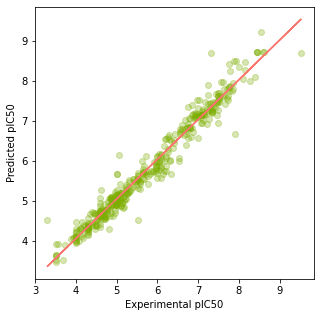

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(x=Y, y= predictions, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, predictions, 1)
p = np.poly1d(z.flatten())

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# **Save Model as Pickle File**


In [21]:
import pickle
pickle.dump(model, open('Amyloid_Beta_A4_model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-28 15:57:57         1816
variables.h5                                   2023-02-28 15:57:57        72160
metadata.json                                  2023-02-28 15:57:57           64
